# Transformers

Today we will examine three transformer-based architectures:
1. The original transformer from https://arxiv.org/pdf/1706.03762.pdf
2. RoBERTa, a transformer encoder from https://arxiv.org/pdf/1907.11692.pdf
3. GPT-2, a transformer decoder from https://s3-us-west-2.amazonaws.com/openai-assets/research-covers/language-unsupervised/language_understanding_paper.pdf

As on Tuesday, I want to acknowledge the fabulous illustrations from Jay Alammar which I reuse here:
* https://jalammar.github.io/illustrated-transformer/
* https://jalammar.github.io/illustrated-gpt2/

## The input

The input to a transformer is a fixed-width sequence of tokens (the width varies from model to model).

Each token is represented by a fixed-length *embedding*. The embedding is the element-wise sum of a token embedding from an embedding dictionary (learned with the model) and a positional embedding from a positional embedding dictionary (learned with the model).

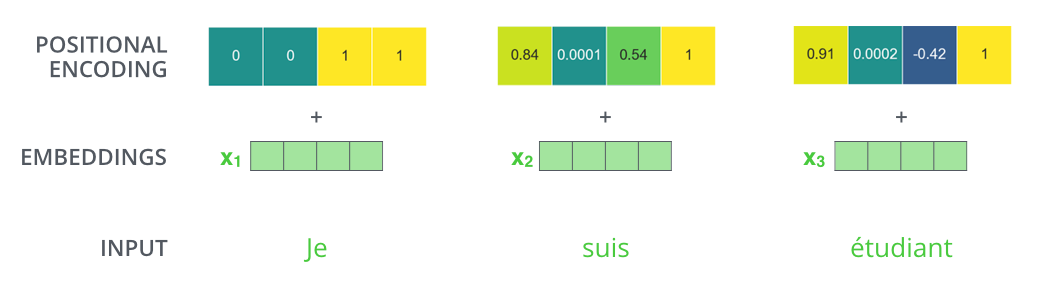

Question:
* *Why do we need the positional embedding?*

## Encoder layers

An encoder layer constructs a contextually-sensitive representation of *the entire input sequence*.

An encoder layer in a transformer has three components:
1. self-attention
2. layer normalization (https://arxiv.org/abs/1607.06450)
3. feed-forward (possibly with more layer normalization)

The purpose of self-attention is to "shade" the representation of each token using the context - the tokens to left *and right* of this token. This acts like the net-in.

The purpose of the feed-forward component for activation.

The layer normalization uses "the mean and variance used ... from all of the summed inputs to the neurons in a layer on a single training case" to normalize its input.

That dashed line you see is called a "residual connection".

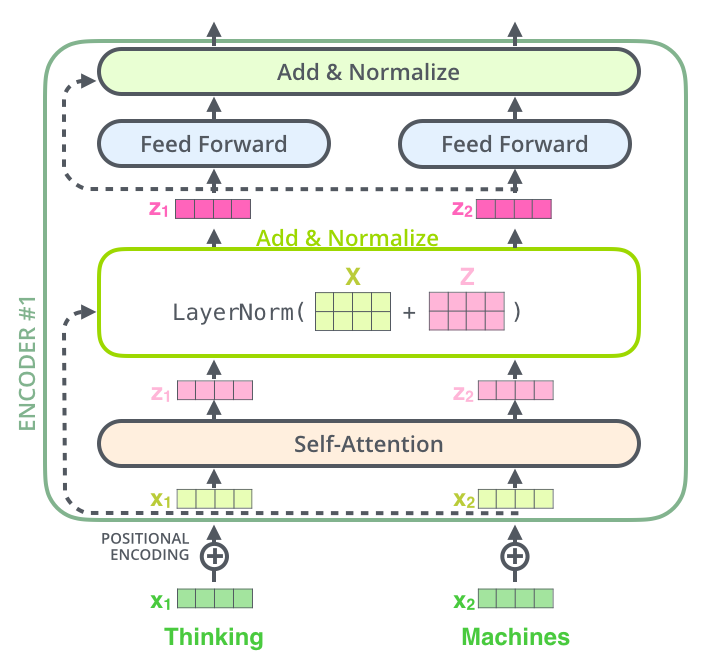

Questions:
* *Why layer normalization?*
* *Why a residual connection?*
* *What is one common type of attention?*

## Decoder layers

A decoder layer constructs a contextually sensitive representation of *the input so far*.

A decoder layer has four components:
1. masked self-attention
2. encoder-decoder self-attention
3. layer normalization
4. feed-forward (possibly with layer normalization)

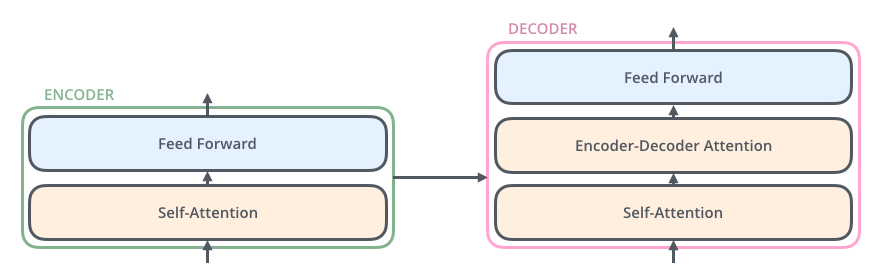

### Masked self-attention

Self-attention pays attention to the entire input sequence.

Masked self-attention pays attention to the input sequence *so far*:
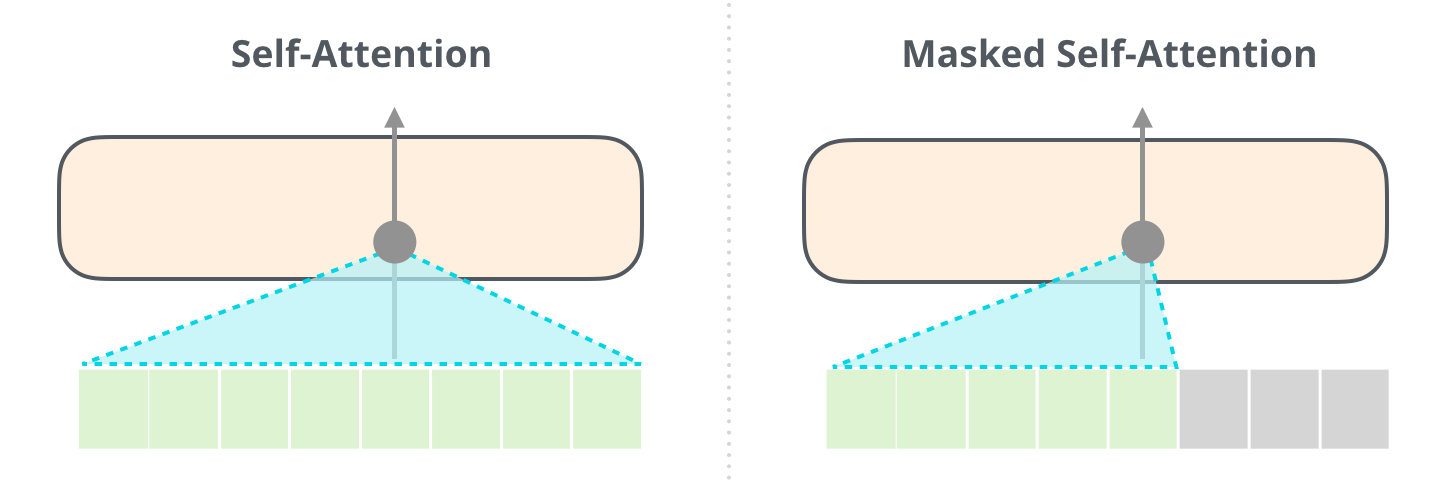

### Encoder-decoder self-attention

The output of the last encoder layer from the encoder in a transformer is fed as intput to every decoder layer. In the encoder-decoder self-attention component it is combined with the input to this decoder layer (after masked self-attention).

In a transformer decoder-only architecture this is dropped.

## Connecting Encoder to Decoder

The output of the last encoder layer, shifted right, is the input to the first decoder layer. It is also the input to every decoder layer that uses encoder-decoder self-attention.

Questions:
* *Why shift?*

## Stacks and stacks...

You can stack encoder layers on the encoder side, and you can stack decoder layers on the decoder side. And don't forget! In a single layer, there can be multi-headed attention!

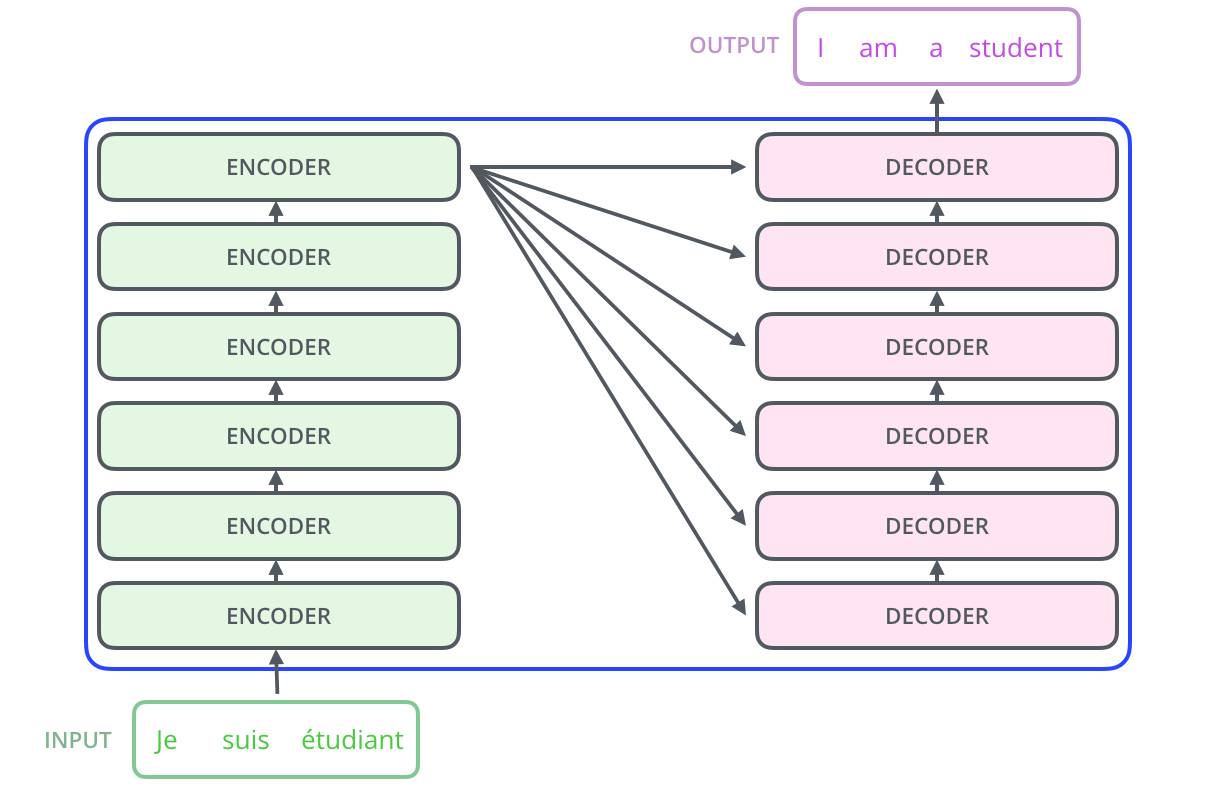

## Output layer

The output layer is a fully-connected neural network with softmax activation (a "linear layer").





# Attention model vs RoBERTa vs GPT

Here we will look in detail at a transformer encoder-decoder, a transformer encoder, and a transformer decoder.

These work for different types of task, as you will see.

Because of this, the *training objective* during *pretraining* varies.
* Viswanathan et al: no pretraining; trained for MT
* RoBERTa: pretrained using masked token prediction (mad libs!) and next sentence prediction (the latter was dropped after experimentation)
* GPT-3: pretrained using next token prediction

Please fill in this table:

| Architecture | Max width input | Number of layers | Multi-headed attention | Layer normalization? | Activation functions | Optimizer | Other regularization | Pretraining data | Evaluated on |
| ------------ | ---------------- | ---------------- | ---------------------- | -------------------- | --------- |--------- | ---------------- | --------------- |------------ |
|   Viswanathan et al (encoder-decoder) |     512            |    6 en, 6 de                    |       8               |    y       |      ReLU            |          Adam    | residual dropout, label smoothing | WMT | BLEU |
|     RoBERTa  (encoder)       |    512       (base)       |     12 (base)                   |    8                  |      y     |          GELU        |           Adam   | | | perplexity (pretraining) |
|      GPT   (decoder)    |        768          |     12                   |         12             |   y        |       GELU           |             Adam | a mod of L2 regularization | | perplexity |


# Transformers for computer vision

Transformer architectures have now been applied to many things: computer vision, speech recognition, speech synthesis, recommender systems....

In particular, in the context of computer vision an architecture called VIT has been developed. Instead of tokens, it uses "patches" from input images.

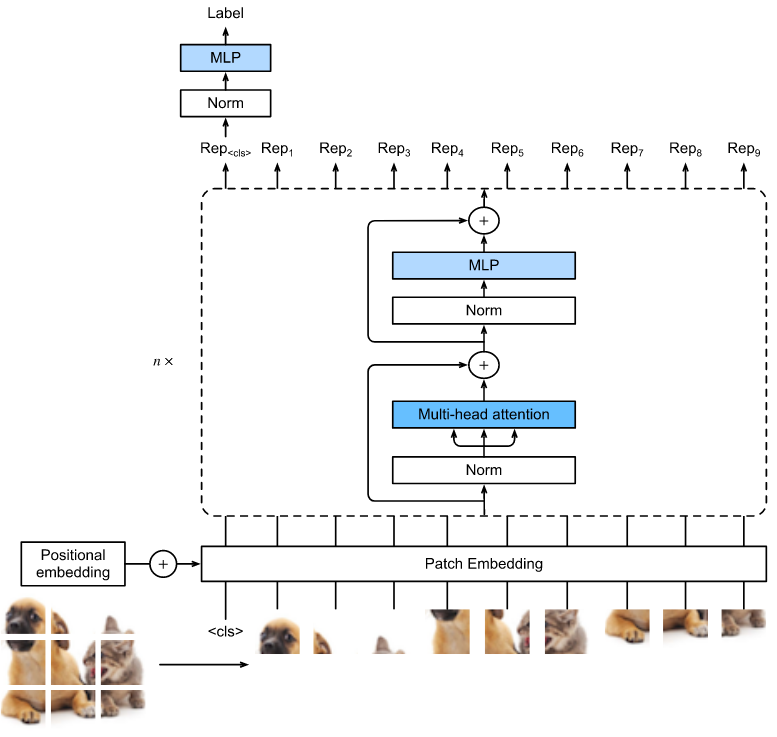

*Image from the textbook*

# How big?

Let's compare the sizes of various transformer models:
* GPT vs GPT-2 vs GPT-3: (https://arxiv.org/pdf/2005.14165.pdf)
* RoBERTa vs distilroBERTa vs T5: 
* VIT-Base vs VIT-Large (https://arxiv.org/pdf/2010.11929v2.pdf)

# Transformers and pretraining

Transformer architectures are **large**. They also are pretrained on **large** amounts of data. 

Pretraining is just training! But with the goal of developing general-purpose contextual representations that can be used for many other purposes through *finetuning*. Tuesday will be all about finetuning.

The point is, very few people train transformer architectures from scratch. Rather, people start with a pretrained transformer and finetune it to their task.

There is a whole python library devoted just to this: **transformers**. We will use transformers on Tuesday to finetune GPT-2 for our recipe data. If you decide to go further working with transformers, I'd recommend this course: https://huggingface.co/learn/nlp-course/chapter1/1. Also I'd recommend a compute environment with multiple GPUs!

Questions:
* *On what hardware was each of the above models pretrained?* 
* *Over how many epochs?*
* *What was the total time consumed in pretraining?*

In [ ]:
!pip install transformers
!pip install torch

In [ ]:
from transformers import pipeline

generator = pipeline('text-generation', model='gpt2')

generator("Measure flour into ,", max_length=30, num_return_sequences=5)